<a href="https://colab.research.google.com/github/Ashish0003/Heart-Attack-Prediction/blob/main/Heart_Attack_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align= "center"> Heart Attack Prediction </h1>

### Project Content
1. [Introduction](#1)
  * 1.1[Aim of the project](#1.1)
  * 1.2[Variables in Dataset](#1.2)    
2. [Importing Libraries and Dataset](#2) 
3. [A look on the dataset](#3)
4. [Analysis 1](#4)
            
                       

<a name= '1'></a>
### **1. Introduction**

❣  *A heart attack, also called a myocardial infarction, happens when a part of the heart muscle doesn’t get enough blood.*

❣ *The more time that passes without treatment to restore blood flow, the greater the damage to the heart muscle.*

❣ *Coronary artery disease (CAD) is the main cause of heart attack,A less common cause is a severe spasm, or sudden contraction, of a coronary artery that can stop blood flow to the heart muscle.*



<a name= '1.1'></a>
#### **1.1 Aim of the project**

❣ *Use the given features ,and predict weather the patient  will get a Heart Attack.* 

❣ *Will use the prediction model to save people from upcoming Heart attack*

<a name= '1.2'></a>
#### **1.2 Variables in Dataset**


- **Age** : Age of the patient

* **Sex** : Sex of the patient

* **exang**: exercise induced angina (1 = yes; 0 = no)

* **ca**: number of major vessels (0-3)

* **cp** : Chest Pain type chest pain type

   * Value 1: typical angina
   * Value 2: atypical angina
   * Value 3: non-anginal pain
   * Value 4: asymptomatic
* **trtbps** : resting blood pressure (in mm Hg)

* **chol** : cholestoral in mg/dl fetched via BMI sensor

* **fbs** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* **rest_ecg** : resting electrocardiographic results

  * Value 0: normal
  * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* **thalach** : maximum heart rate achieved

* **target** : 0= less chance of heart attack 1= more chance of heart attack


❗ *Additional Variables Description*
1. age - age in years

2. sex - sex (1 = male; 0 = female)

3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)

5. chol - serum cholestoral in mg/dl

6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest

11. slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

12. ca - number of major vessels (0-3) colored by flourosopy

13. thal - 2 = normal; 1 = fixed defect; 3 = reversable defect

14. num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)

<a name= '2'></a>
#### **2. Importing Libraries and Dataset**

In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/heart.csv')

<a name= '2'></a>
#### **3. A look on the dataset**

In [5]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
Unique_Values=[]
for i in df.columns:
  x=df[i].value_counts().count()
  Unique_Values.append(x)

print(Unique_Values)
    

[41, 2, 4, 49, 152, 2, 3, 91, 2, 40, 3, 5, 4, 2]


In [8]:
pd.DataFrame(Unique_Values, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [9]:
df.shape

(303, 14)

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

<a name='4'></a>
### **4. Preliminary Analysis**


- The Data Set consists of 303 Datapoints and 14 Features.
- The type of all the variables in the data set are in numerical format. (Integer Or Float)
- Seeing the info of the datset, there is no missing value(NaN Value) in the data set.
- *As per variable description "thal" features should have only 3 values i.e 1,2 and 3,but unique value counts produces 4 values ,so have to check that*
- 1.   **Numerical Variable** - ['age', 'trtbps', 'chol', 'thalachh','oldpeak']
  2.  **Categorical Variable**- ['sex', 'cp', 'fbs', 'restecg'
       'exng','slp', 'caa', 'thall', 'output']






### **5.Explortory Data Analysis**

#### *5.1 Inconsistency in "thal" feature*

In [11]:
df.thall.value_counts()

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

- It looks like 0 is a null value ,as per vriable description thall hvae only 3 values i.e 1,2 and 3

In [12]:
df["thall"] = df["thall"].replace(0, np.nan)

In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       2
output      0
dtype: int64

In [14]:
df["thall"].fillna(df.thall.mode(), inplace = True)


In [15]:
df.thall.value_counts()

2.0    166
3.0    117
1.0     18
Name: thall, dtype: int64

In [16]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       2
output      0
dtype: int64

- In "thall" column 2 datapoints were missing i.e null.
-  Since "thall' is a categorical feature we used 'mode' to fill the null values.
- Now there are no values in our dataset.

#### *5.2 Seperating Numerical and Categorical Features* 

In [17]:
Numerical_var= ['age', 'trtbps', 'chol', 'thalachh','oldpeak']
Categorical_var=['sex', 'cp', 'fbs', 'restecg',
       'exng','slp', 'caa', 'thall', 'output']

#### *5.3 Stats of numerical variables.*

In [18]:
df[Numerical_var].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


#### *5.4 Univariate Analysis*

##### 5.4.1 Age 

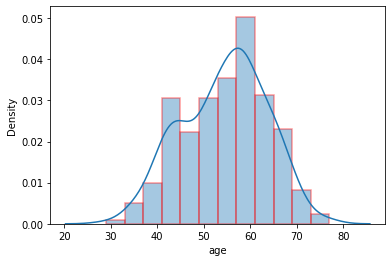

In [19]:
sns.distplot(df.age,hist_kws = dict(linewidth = 1.5, edgecolor = "r"));

- The minimum value of the ages is 29, and the maximum value is 77.
- The mean of the data for the age is 54.
- If we calculate mean ,(29+77)/2 = 53
- This implies that age variable has a normal distribution. The normal distribution is the ideal statistical distribution for us.

##### 5.4.2 trtbps

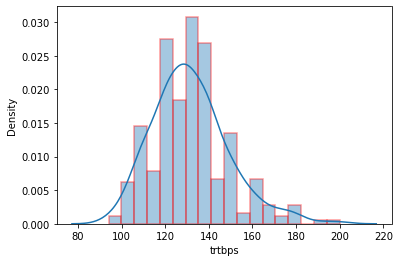

In [20]:
sns.distplot(df.trtbps,hist_kws = dict(linewidth = 1.5, edgecolor = "r"));

- The minimum value for the "trtbps" variable is 94, and the maximum value is 200. The average of these two numbers is 147.
- The mean is 131.
- "trtbps" data tends to be normally distributed.
- It is slightly right skewed data, but we can say that it is normal distribution.

##### 5.4.2 chol

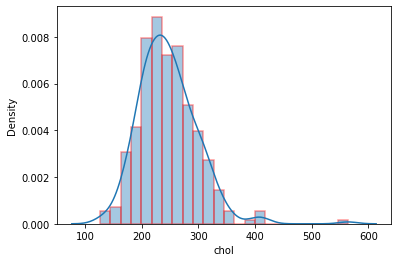

In [21]:
sns.distplot(df.chol,hist_kws = dict(linewidth = 1.5, edgecolor = "r"));

- Outliers are present in "chol".
- Distribution seems to be normal.
- minimum value= 126 ,maximum value = 564
- calculated average= (126+564)/2 is 344.
- Described mean=245 
- there is a difference in both values, due to presence of outliers data is slightly right skewed .

##### 5.4.4 thalachh

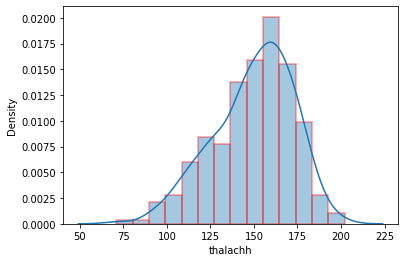

In [22]:
sns.distplot(df.thalachh,hist_kws = dict(linewidth = 1.5, edgecolor = "r"));

- There is a left skew, although not much.
- When we examine the quartiles, The 25%, 50%, and 75% sections between the minimum and maximum values are homogeneously distributed.
- As a result, the data tends to be normally distributed.

##### 5.4.5 oldpeak

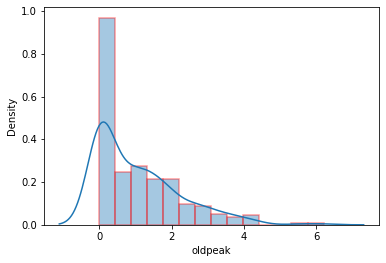

In [23]:
sns.distplot(df.oldpeak,hist_kws = dict(linewidth = 1.5, edgecolor = "r"));

- Data is right skewed.
- Values of the vast majority of patients in the variable range from 0 to 1.5.

#### ▶ *Using loop to get visualisation(Distplot)*

In [24]:
tittle_font={'family':'serif',"color":'g','size':20}
axis_font={'family':'serif',"color":'red','size':15}


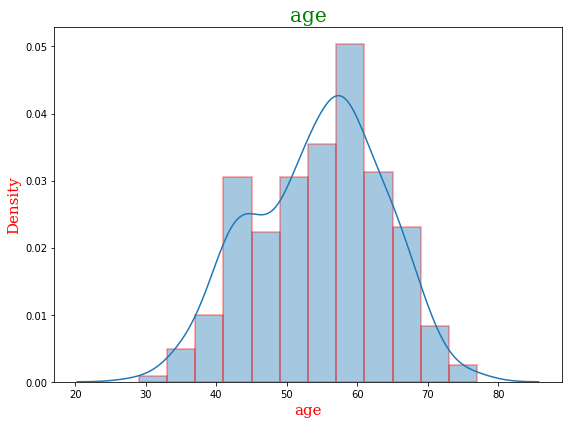

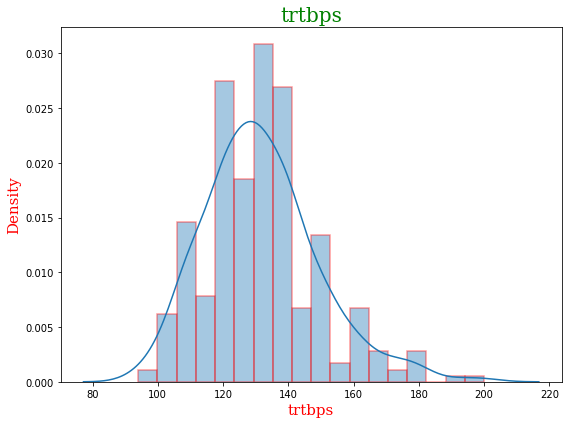

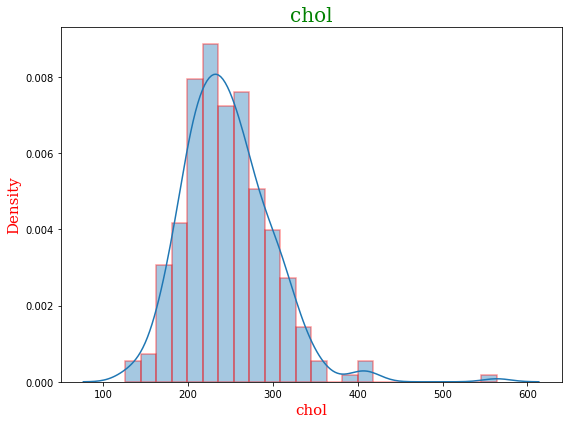

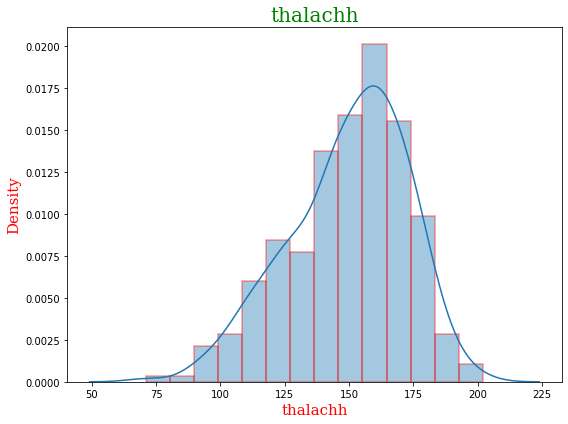

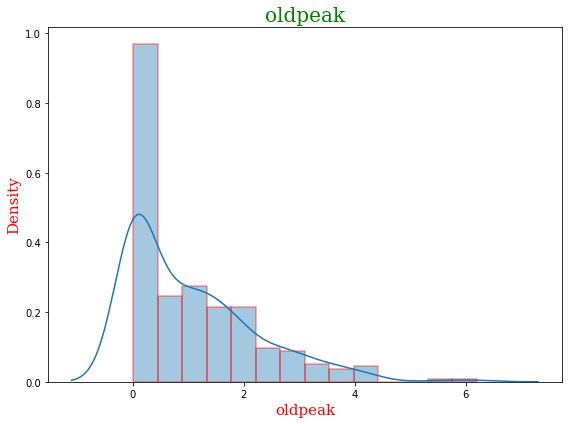

In [25]:

for i in Numerical_var:
  plt.figure(figsize=(8,6))
  sns.distplot(df[i],hist_kws = dict(linewidth = 1.5, edgecolor = "r"));

  plt.title(i,fontdict=tittle_font)
  plt.xlabel(i,fontdict=axis_font)
  plt.ylabel("Density",fontdict=axis_font)

  plt.tight_layout()
  plt.show();

#### 5.4.6 - Visualizing and Analysing Categorical Variable

In [26]:
Categorical_var 

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

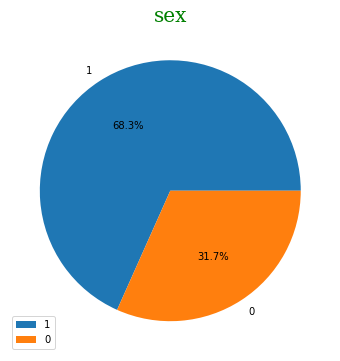

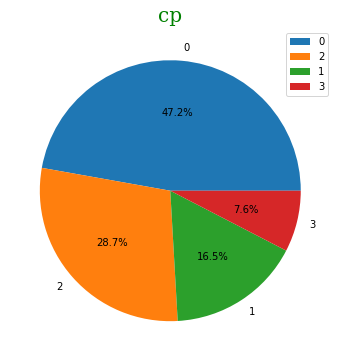

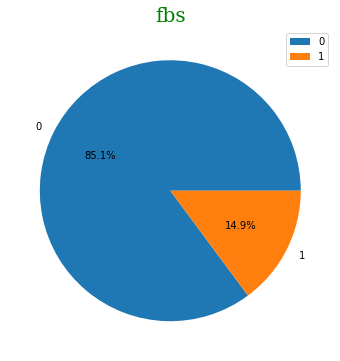

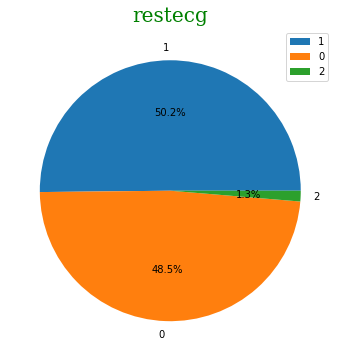

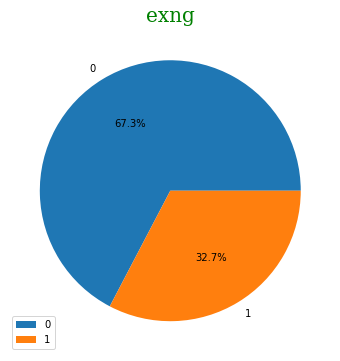

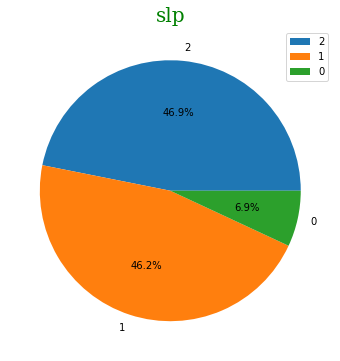

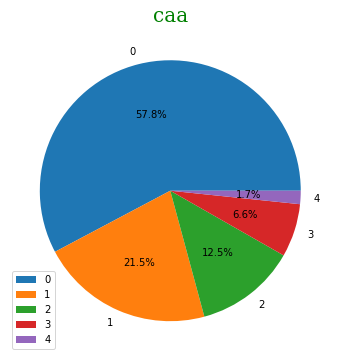

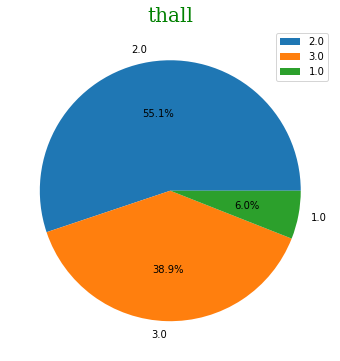

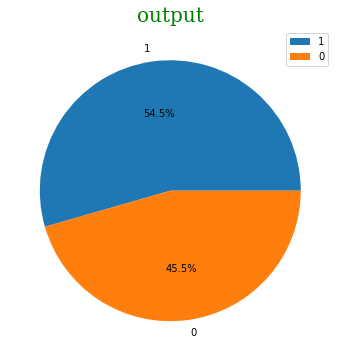

In [28]:
for i in Categorical_var:
  fig, ax= plt.subplots(figsize=(8,6))

  values=list(df[i].value_counts())
  labels=list(df[i].value_counts().index)

  ax.pie(values,labels=labels,autopct="%1.1f%%")

  plt.title(i,fontdict=tittle_font)

  plt.legend()
  plt.show()
  

#### Sex Variable
- The number of male patients is more than twice that of female patients.
#### Cp Variable
- Almost half of the patients have an observation value of 0. In other words, there is asymptomatic angina
- Half of the patients are asymptomatic; they have pain without symptoms.
- If we examine the other half of the pie chart, 1 out of 4 patients has an observation value of 2.
- This observation value shows patients with shortness of breath or non-classical pain.
- The other two observation values are less than the others.
#### Fbs Variable
- The vast majority of patients have an observation value of 1.
- The fasting blood sugar of these patients is more than 120 mg/dl.
#### Rest_ecg Variable
- The thing that draws attention to the image of this variable is that the number of patients with value 2 is negligible.
- The total numbers of other patients with observation values of 1 and 0 are almost equal.
#### Exang Variable
- According to the variable "exang," the pain caused by this angina is represented by a value of 1 if it occurs with any exercise and 0 if it does not.
- In this context, Values 0 are more than twice as values 1. More than half of the patients do not have exercise-induced angina.

#### Slope Variable
- The minimum observation value is 0 with 7 percent.
- The ST wavelength of half of the remaining patients is 1, that is straight, while the observation value of the other half is 2, that is, the ST wavelength is sloped upwards.

#### ca

#### Target Variable
- More than half of the patients, 54.5 percent, have a heart attack risk. The remaining 45.5 percent have no heart attack risk.

#### *5.5 Bi-Variate Analysis* 

#### 5.5.1 Analysis of Categorical Variables wrt Output(CountPlot)

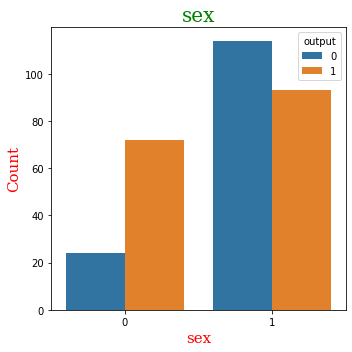

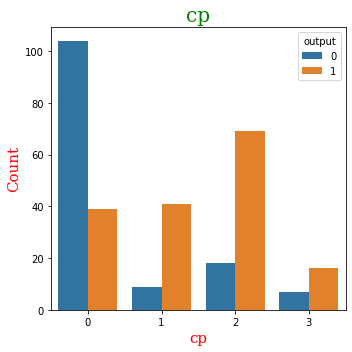

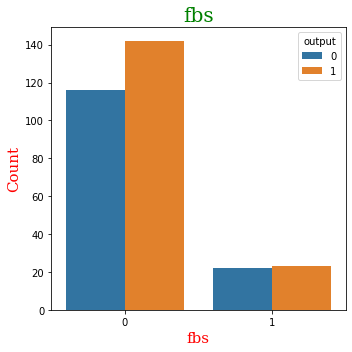

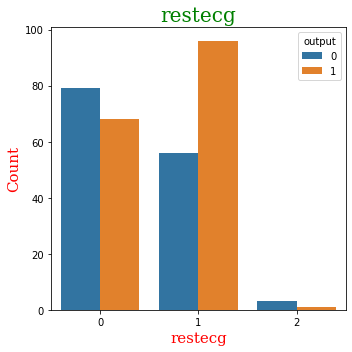

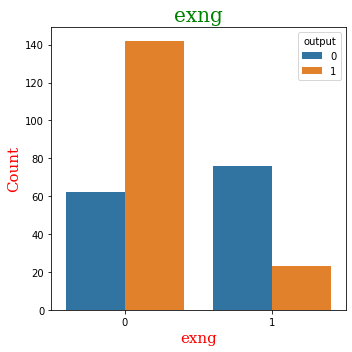

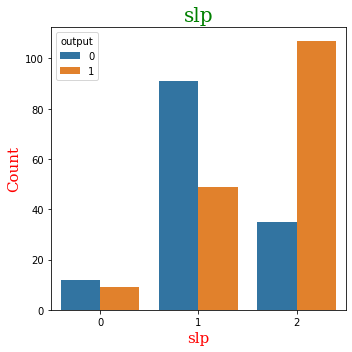

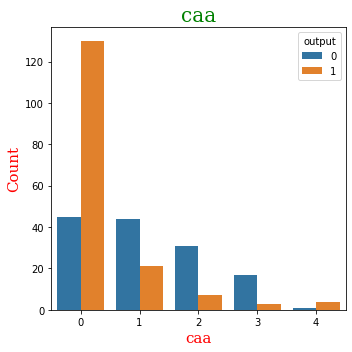

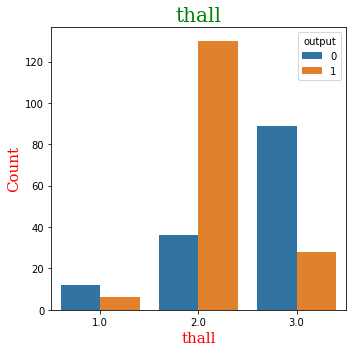

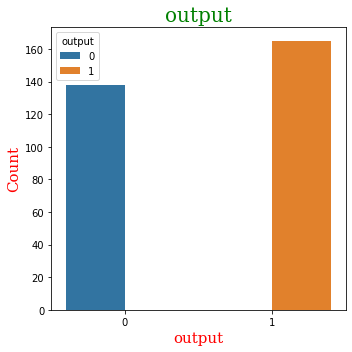

In [ ]:
for i in Categorical_var:
  plt.figure(figsize=(5,5))
  sns.countplot(df[i],hue='output',data=df);

  plt.title(i,fontdict=tittle_font)
  plt.xlabel(i,fontdict=axis_font)
  plt.ylabel("Count",fontdict=axis_font)

  plt.tight_layout()
  plt.show();

#### Sex

* Patients at high risk of heart attack from women are almost more than half of those with low.
* The situation is different for those with an observation value of 1.
* So men are more likely than not to have a heart attack.
* **In summary, female patients are at higher risk for heart attack**

#### Cp  

* First bar graph has an observation value of 0, asymptomatic pains. This pain was pain that occurred without symptoms. 
* Patients with this pain are less likely to have a heart attack. When we look at the probability of not having a heart attack, we can say that it is almost three times the other.
* In the other three types of pain, having a heart attack is almost three times higher than the risk of not having it.


#### Fbs

* The risk of heart attack is slightly higher in those with a 0 observation value as fasting blood sugar.
* **Patients with fasting blood sugar lower than 120 mg/dl can be positioned as risky.**
* If we look at the value of 1 observation value, the situation seems to be somewhat equal here.
* In other words, it is a little challenging to say anything definite about heart attack in patients with fasting blood sugar greater than 120 mg/d.


#### Rest_ecg

* **Attention should be paid to patients with a "rest ecg" value of 1**. Because the risk of having a heart attack is almost two times higher than that of not having a heart attack. 
* The other two observation values are also more likely not to have a heart attack.

#### Exang
* Pain due to exercise does not affect the heart attack.
* If the patient's "exang" variable is 1, that is, if he has exercise-related angina, the probability of not having a heart attack is higher. 
* In contrast, patients who do not have exercise-related angina are more likely to have a heart attack.
* **This means that exercise-related pain has nothing to do with a heart attack.**

#### Slope

* **It is necessary to pay attention to the patients with a "slope" variable of 2.**
* Because patients with an observation value of 2 are three times more likely to have a heart attack than not having a heart attack.
* If we examine other values, the risk of heart attack is lower in patients with an observation values of 0 and 1. 

#### Ca 

* The group at risk for this variable is patients with an observation value of 0.
* If you notice, the risk of heart attack is almost three times higher in patients with an observation value of 0.
* For 1, 2, and 3 observation values, this shows the opposite situation.


#### Thal

* Patients with an observation value of 2 are three times more likely to have a heart attack than if they have not. 
* The opposite is true for other values. The situation of not having a heart attack appears to be higher.

#### 5.5.1 Analysis of Numerical Variables(Pairplot)

In [35]:
Numerical_var

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

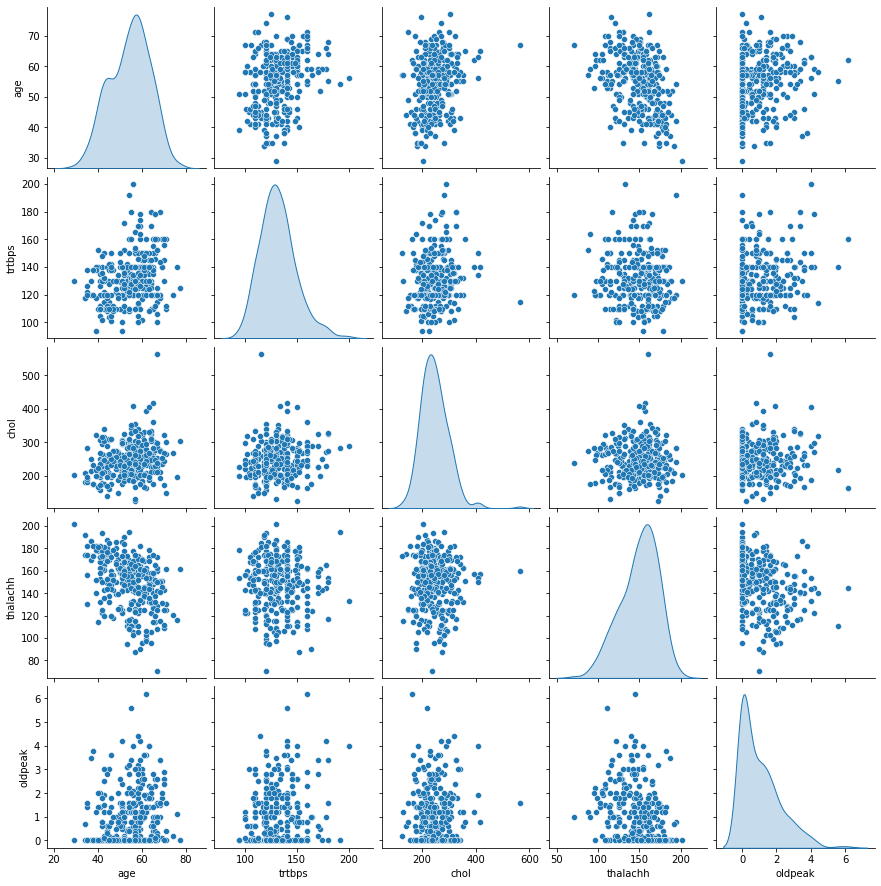

In [34]:
sns.pairplot(df[Numerical_var], diag_kind = "kde")

#### 5.5.2 Heatmap

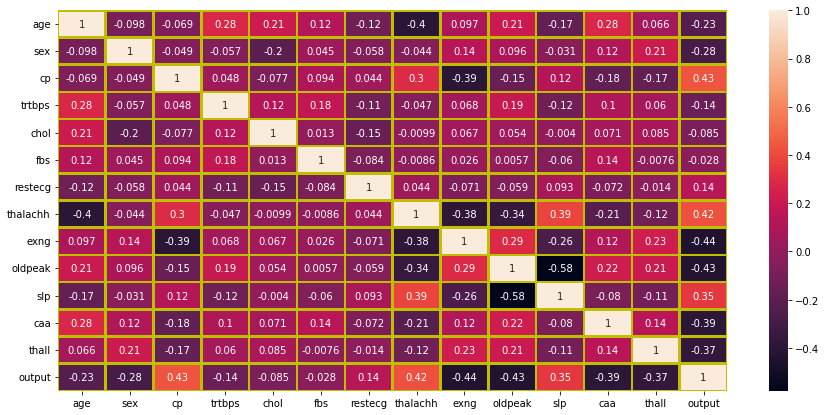

In [43]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),linewidths=1.5,linecolor='y',annot=True);

In [62]:
# one hot encoding 
df_encod = pd.get_dummies(df[Categorical_var], columns = Categorical_var[:-1], drop_first = True)

In [63]:
df_encod

,output,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_2.0,thall_3.0
0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1
299,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
300,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1
301,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1


In [64]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
scaled_data = robust_scaler.fit_transform(df[Numerical_var])


In [65]:
df_scaled = pd.DataFrame(scaled_data, columns = Numerical_var)
df_scaled.head()

,age,trtbps,chol,thalachh,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250


In [66]:
df_new = pd.concat([df_scaled, df_encod], axis = 1)

In [67]:
df_new

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,restecg_2,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_2.0,thall_3.0
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
299,-0.740741,-1.00,0.377953,-0.646154,0.2500,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
300,0.962963,0.70,-0.740157,-0.369231,1.6250,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
301,0.148148,0.00,-1.716535,-1.169231,0.2500,0,1,0,0,0,...,0,1,1,0,1,0,0,0,0,1


In [69]:
from sklearn.model_selection import train_test_split
X = df_new.drop(["output"], axis = 1)
y = df_new[["output"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

In [72]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (272, 21)
X_test: (31, 21)
y_train: (272, 1)
y_test: (31, 1)


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [84]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [75]:
y_pred = log_reg.predict(X_test)

In [76]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.8387096774193549


In [82]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X_test, y_test, cv = )
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7777777777777778


In [83]:
from sklearn.model_selection import GridSearchCV

In [85]:
log_reg_new = LogisticRegression()
log_reg_new

LogisticRegression()

In [89]:
parameters = {"penalty":["l1","l2"], "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [94]:
log_reg_grid = GridSearchCV(log_reg_new, param_grid = parameters)

In [95]:
log_reg_grid.fit(X_train, y_train)
print("Best Parameters: ", log_reg_grid.best_params_)

Best Parameters:  {'penalty': 'l1', 'solver': 'liblinear'}


In [100]:
log_reg_new2 = LogisticRegression(penalty = "l2", solver = "saga")
log_reg_new2
log_reg_new2.fit(X_train, y_train)

LogisticRegression(solver='saga')

In [101]:
y_pred = log_reg_new2.predict(X_test)
print("The test accuracy score of Logistic Regression After hyper-parameter tuning is: {}".format(accuracy_score(y_test, y_pred)))

The test accuracy score of Logistic Regression After hyper-parameter tuning is: 0.8387096774193549


In [102]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state = 5)
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)

In [103]:
print("The test accuracy score of Decision Tree is:", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is: 0.6774193548387096


In [104]:
scores = cross_val_score(dec_tree, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.775


In [105]:
from sklearn.svm import SVC
svc_model = SVC(random_state = 5)
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

In [106]:
print("The test accuracy score of SVM is:", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is: 0.8387096774193549


In [107]:
scores = cross_val_score(svc_model, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7416666666666667


In [108]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state = 5)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [109]:
print("The test accuracy score of Random Forest is", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is 0.8387096774193549


In [110]:
scores = cross_val_score(random_forest, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7416666666666667


In [111]:
random_forest_new = RandomForestClassifier(random_state = 5)
parameters = {"n_estimators" : [50, 100, 150, 200], 
              "criterion" : ["gini", "entropy"], 
              'max_features': ['auto', 'sqrt', 'log2'], 
              'bootstrap': [True, False]}
              

In [114]:
random_forest_grid = GridSearchCV(random_forest_new, param_grid = parameters)
random_forest_grid.fit(X_train, y_train)
print("Best Parameters:", random_forest_grid.best_params_)


Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 200}


In [115]:
random_forest_new2 = RandomForestClassifier(bootstrap = True, criterion = "gini", max_features = "auto", n_estimators = 200, random_state = 5)

In [116]:
random_forest_new2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=5)

In [117]:
y_pred = random_forest_new2.predict(X_test)
print("The test accuracy score of Random Forest after hyper-parameter tuning is:", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest after hyper-parameter tuning is: 0.8387096774193549
